initialized:
weight changed:
die created:
this is the created die:
    side  weights
0     1      0.1
1     2      0.1
2     3      0.1
3     4      0.5
4     5      0.1
5     6      0.1
show die state with method call:
show die state2:
    side  weights
0     1      0.1
1     2      0.1
2     3      0.1
3     4      0.5
4     5      0.1
5     6      0.1
rolled die:
results:    0
0  6
1  1
2  4
3  4
4  4
5  4
6  4
7  4
8  4
9  4


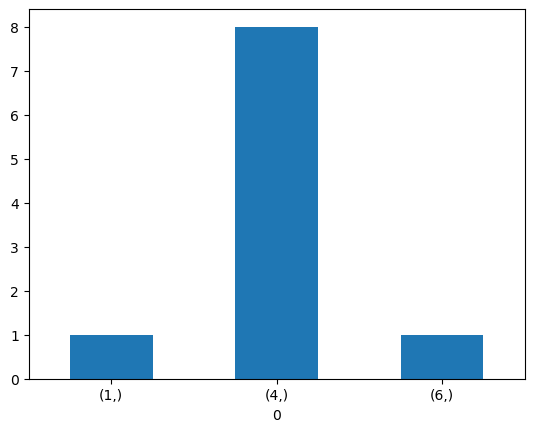

In [2]:
import numpy as np
import pandas as pd

class Die():
    '''General Definition
    A die has 𝑁 sides, or “faces”, and 𝑊 weights,
    and can be rolled to select a face.
    For example, a “die” with 𝑁=2 is a coin, and
    a one with 𝑁=6 is a standard die.
    Normally, dice and coins are “fair,” meaning that the
    each side has an equal weight.
    An unfair die is one where the weights are unequal.
    Each side contains a unique symbol.
    Symbols may be all alphabetic or all numeric.
    𝑊 defaults to 1.0 for each face
    but can be changed after the object is created.
    The weights are just positive numbers (integers or floats, including 0),
    not a normalized probability distribution.
    The die has one behavior, which is to be rolled one or more times.
    Specific Methods and Attributes:
        1. An initializer
        2. Change the weight of a single side.
        3. Create die
        4. Roll die
        5. Show die's current state
    '''
    def __init__(self, faces):
        self.faces = faces
        ''' Takes a NumPy array of faces as an argument.'''

        # verify faces is type (np.ndarray); TypeError if not
        if not isinstance (self.faces, np.ndarray):
            raise TypeError('faces is not an np array')

        # Tests to see if the values are distinct; ValueError if not
        if len(self.faces) != len(set(self.faces)):    # 'set' values are unique
            raise ValueError('faces are not unique')
            # NOTE: faces = np.unique (faces) removes "redundant" values        

        # Internally initializes the weights to 1.0 for each face.
        self.weights = np.ones(len(self.faces))
        #print (faces, weights)

        # Saves both faces and weights in a private data frame
        #   with faces in the index.
        index_values = [self.faces]
        self.faces_df = pd.DataFrame({'weights': self.weights}, index=index_values)

    def change_weight (self, face_to_change, new_weight=1):
        '''Takes two arguments: the face value to be changed and the new weight.'''
        self.face_to_change = face_to_change
#        self.new_weight = new_weight

        # Checks to see if the face passed is valid value,
        #   i.e. if it is in the die array; IndexError if not
        if self.face_to_change not in self.faces_df.index:
#        if self.face_to_change not in self.faces_df.values:
            raise IndexError('face_to_change not in faces.df')

        # Checks to see if the weight is a valid type,
        #   i.e. if it is numeric (integer or float); TypeError if not
#        if not isinstance(self.new_weight, (int, float)):
        if not isinstance(new_weight, (int, float)):
            raise TypeError('new_weight is not valid type')
           
        # change face's weight
        # subtract 1 to change correct face due to Python offset
        self.faces_df.loc[face_to_change-1] = new_weight
        
    def create_die (self, faces_df):
        '''Create the die using the object's weights. Save to self as a DataFrame.'''
        n_sides = len(self.faces_df.weights)
        my_probs = [i/sum(self.faces_df.weights) for i in self.faces_df.weights]
        self.die = pd.DataFrame({
        'side': range(1, n_sides + 1),
        'weights': my_probs
        })
        return self.die

    def roll_die (self, number_of_rolls = 1):
        '''takes a parameter of how many times the die is to be rolled; defaults to 1.'''
        self.number_of_rolls = number_of_rolls
        # print (self.die, '\nsum of weights:', sum(self.die.weights))
        # print ('number of rolls:', self.number_of_rolls)   

        # This is essentially a random sample with replacement,
        #   from the private die data frame, that applies the weights.
        results = []
        for i in range(self.number_of_rolls):
            result = self.die.side.sample(weights=self.die.weights, replace=True).values[0]
            results.append(result)
        self.result = pd.DataFrame(results)
        return (self.result)
        #return pd.Series(results)
        
    def show_die_state(self, die):
        '''A method to show the die’s current state.
        Returns a copy of the private die data frame.'''
        self.die = die
        die_deep = self.die.copy()
#        die_deep
        return die_deep
        
    def plot_results(self, my_results):
        '''Show the results of rolling the dice n times with a simple bar graph.'''
        my_results.value_counts().sort_index().plot.bar(rot=0);
        #  Returns a copy of the private die data frame.

faces = np.arange (6)  # creates array
faces_df = Die(faces)
print ('initialized:')

faces_df.change_weight (4, 5)
print ('weight changed:')

die = faces_df.create_die (faces_df)    # create die with updated weights
print ('die created:')
print ('this is the created die:\n', die)

print ('show die state with method call:')
die_deep2 = faces_df.show_die_state (die)
print ('show die state2:\n', die_deep2)

results = faces_df.roll_die(10)
print ('rolled die:') 
print ('results:', results)
faces_df.plot_results (results)


In [4]:
#help (Die)

In [4]:
import numpy as np
import pandas as pd

def initializer (faces):
    # Takes a NumPy array of faces as an argument.

    # verify faces is type (np.ndarray); TypeError if not
    if not isinstance (faces, np.ndarray):
        raise TypeError('faces is not an np array')

    # Tests to see if the values are distinct; ValueError if not
    if len(faces) != len(set(faces)):    # 'set' values are unique
        raise ValueError('faces are not unique')
        # faces = np.unique (faces) will remove "redundant" values        

    # Internally initializes the weights to 1.0 for each face.
    weights = np.ones(len(faces))   
    number_of_rolls = 1    # NEW INITIALIZATION
    #print (faces, weights)

    # Saves both faces and weights in a private data frame
    #   with faces in the index.
    index_values = [faces]
    faces_df = pd.DataFrame({'weights': weights}, index=index_values)
    return (faces_df)
    
faces = np.arange (6)  # creates array
#print (faces)
faces_df = initializer(faces)
print (faces_df)

   weights
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0


In [5]:
import numpy as np
import pandas as pd

def change_weight (face_to_change, new_weight):
    # Takes two arguments: the face value to be changed and the new weight.

    # Checks to see if the face passed is valid value,
    #   i.e. if it is in the die array; IndexError if not
    if face_to_change not in faces_df.index:
        raise IndexError('face_to_change not in faces.df')

    # Checks to see if the weight is a valid type,
    #   i.e. if it is numeric (integer or float); TypeError if not
    if not isinstance(new_weight, (int, float)):
        raise TypeError('new_weight is not valid type')

    # change face's weight
    faces_df.loc[face_to_change] = new_weight
    
change_weight (4, 5)
print (faces_df)
die = create_die (faces_df)
results = roll_die (10)
plot_results (results)

   weights
0      1.0
1      1.0
2      1.0
3      1.0
4      5.0
5      1.0


NameError: name 'create_die' is not defined

In [6]:
import numpy as np
import pandas as pd

def create_die (faces_df):
    # Create the die using the object's weights. 
    #   Save to self as a DataFrame."
    n_sides = len(faces_df.weights)
    my_probs = [i/sum(faces_df.weights) for i in faces_df.weights]
    die = pd.DataFrame({
    'side': range(1, n_sides + 1),
    'weights': my_probs
    })
    return (die)

def roll_die (number_of_rolls=1):
    # Takes a parameter of how many times the die is to be rolled; 
    #   defaults to 1.
       
    print (die, '\nsum of weights:', sum(die.weights))
    print ('number of rolls:', number_of_rolls)   
    
    # This is essentially a random sample with replacement,
    #   from the private die data frame, that applies the weights.
    results = []
    for i in range(number_of_rolls):
        result = die.side.sample(weights=die.weights, replace=True).values[0]
        
#        print (result)
        results.append(result)
#        print (results)
    results = pd.Series(results)
    return (results)
    #return pd.Series(results)

#    def plot_results(my_results):

def plot_results(my_results):
    "Show copy of die data frame."
    "Show the results of rolling the dice n times with a simple bar graph."
    die_deep = die.copy(die)
    print (my_results)
    my_results.value_counts().sort_index().plot.bar(rot=0);
    # A method to show the die’s current state.
    #  Returns a copy of the private die data frame.

die = create_die (faces_df)
die
results = roll_die (10)
plot_results (results)

   side  weights
0     1      0.1
1     2      0.1
2     3      0.1
3     4      0.1
4     5      0.5
5     6      0.1 
sum of weights: 1.0
number of rolls: 10


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().